In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 14.7 MB/s 
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 240 kB 39.8 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 106 kB 58.6 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 278 kB/s 
     |████████████████████████████████| 943 kB 47.7 MB/s 
     |████████████████████████████████| 4.1 MB 47.1 MB/s 
     |████████████████████████████████| 1.9 MB 43.0 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12226 sha256=690a90a8feaa8955f4039d512f5e84b5ef0b7ff8cc2bf6604981344e5048ea5a
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee5

In [ ]:
from qiskit import *
import numpy as np

In [ ]:
num_qubits=3
circ=QuantumCircuit(num_qubits,num_qubits)
circ.h(range(num_qubits))
circ.measure(range(num_qubits),range(num_qubits))

In [ ]:
backend_sim=Aer.get_backend('qasm_simulator')
job_sim=execute(circ,backend_sim,shot=1024)
result_sim=job_sim.result()
counts=result_sim.get_counts(circ)
print(counts)

{'101': 117, '010': 140, '110': 132, '100': 134, '111': 124, '000': 128, '011': 121, '001': 128}


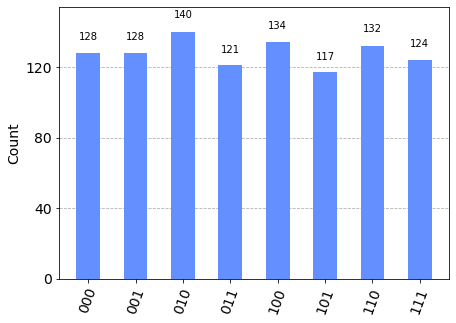

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
def quantum_dice_simulated():
  def random_num():
    backend_sim=Aer.get_backend('qasm_simulator')
    job_sim=execute(circ,backend_sim,shots=1)
    result_sim=job_sim.result()
    counts=result_sim.get_counts(circ)

    return int(list(counts.keys())[0] , 2)
  
  num=random_num()
  while num==7 or num==0:
    num=random_num()
  return num

In [ ]:
for _ in range(1,2):
  print(quantum_dice_simulated())

3


In [ ]:
class Player:
  name=None
  score=None
  noOfSixes=None
  diceRoleOutcomes=None
  def __init__(self,NameOfStudent):
    self.name=NameOfStudent
    self.diceRoleOutcomes=[]
    self.score=0
    self.noOfSixes=0
  def getScore(self):
    self.score=sum(self.diceRoleOutcomes)
    return self.score
  def getNoOfSixes(self):
    self.noOfSixes=self.diceRoleOutcomes.count(6)
    return self.noOfSixes
  def rollTheDice(self):
    diceRollOutcome=quantum_dice_simulated()
    self.diceRoleOutcomes.append(diceRollOutcome)
    #print(diceRollOutcome)
  def getDiceRollOutcomes(self):
    return self.diceRoleOutcomes
player1= Player("Shweta")
player2=Player("Sapna")
player3=Player("Srishti")
player4=Player("Prachi")
for i in range(20):
  player1.rollTheDice()
  player2.rollTheDice()
  player3.rollTheDice()
  player4.rollTheDice()
  print(player1.name, player1.getDiceRollOutcomes())
  print(player2.name, player2.getDiceRollOutcomes())
  print(player3.name, player3.getDiceRollOutcomes())
  print(player4.name, player4.getDiceRollOutcomes())

  print("player 1 score ",player1.getScore())
  print("player 2 score ",player1.getScore())
  print("player 3 score ",player3.getScore())
  print("player 4 score ",player4.getScore())

  print("player 1 no of sixes ",player1.getNoOfSixes())
  print("player 2 no of sixes ",player2.getNoOfSixes())
  print("player 3 no of sixes ",player3.getNoOfSixes())
  print("player 4 no of sixes ",player4.getNoOfSixes())

Shweta [4]
Sapna [4]
Srishti [5]
Prachi [4]
player 1 score  4
player 2 score  4
player 3 score  5
player 4 score  4
player 1 no of sixes  0
player 2 no of sixes  0
player 3 no of sixes  0
player 4 no of sixes  0
Shweta [4, 5]
Sapna [4, 6]
Srishti [5, 3]
Prachi [4, 1]
player 1 score  9
player 2 score  9
player 3 score  8
player 4 score  5
player 1 no of sixes  0
player 2 no of sixes  1
player 3 no of sixes  0
player 4 no of sixes  0
Shweta [4, 5, 1]
Sapna [4, 6, 3]
Srishti [5, 3, 2]
Prachi [4, 1, 2]
player 1 score  10
player 2 score  10
player 3 score  10
player 4 score  7
player 1 no of sixes  0
player 2 no of sixes  1
player 3 no of sixes  0
player 4 no of sixes  0
Shweta [4, 5, 1, 6]
Sapna [4, 6, 3, 1]
Srishti [5, 3, 2, 2]
Prachi [4, 1, 2, 3]
player 1 score  16
player 2 score  16
player 3 score  12
player 4 score  10
player 1 no of sixes  1
player 2 no of sixes  1
player 3 no of sixes  0
player 4 no of sixes  0
Shweta [4, 5, 1, 6, 5]
Sapna [4, 6, 3, 1, 5]
Srishti [5, 3, 2, 2, 2]
Prac

In [ ]:

class Game:
  __player1=None
  __player2=None
  __player3=None
  __player4=None
  players = []
  sixes = []
  scores = []
  winner=None
  def __init__(self,Player1,Player2,Player3,Player4):
    self.__player1=Player1
    self.__player2=Player2
    self.__player3=Player3
    self.__player4=Player4
    self.players = [self.__player1,self.__player2,self.__player3,self.__player4]
  def getMaxSix(self):
    for i in range(len(self.players)):
      self.sixes.append(self.players[i].getNoOfSixes())
    sixIndex = self.sixes.index(max(self.sixes))
    self.winner = self.players[sixIndex]
  def getwinner(self):
    if self.__player1.getNoOfSixes()>self.__player2.getNoOfSixes():
      self.winner=self.__player1
    elif self.__player1.getNoOfSixes()==self.__player2.getNoOfSixes():
        if self.__player1.getScore()>self.__player2.getScore():
          self.winner=self._player1
        else:
            self.winner=self.__player2
    else:
      self.winner=self.__player2

Game1 = Game(player1,player2,player3,player4)
Game1.getMaxSix()
print("The Winner of the game is: ",Game1.winner.name)

The Winner of the game is:  Srishti
